In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Read data

In [36]:
df = pd.read_csv('BankChurners.csv')

In [37]:
print(df.shape)
df

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

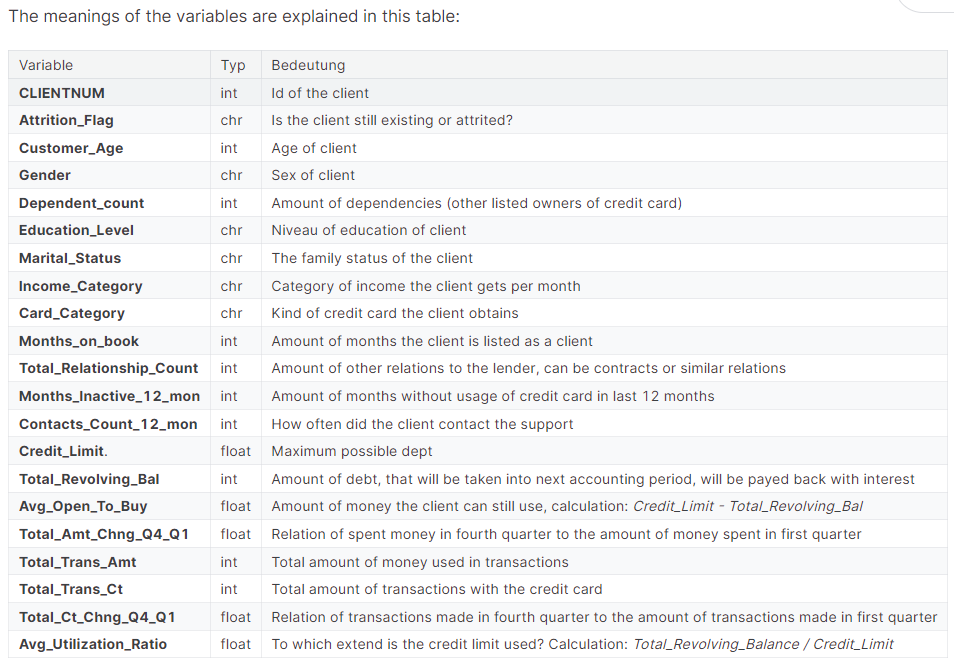

 'Attrition_Flag': ['Existing Customer' 'Attrited Customer']


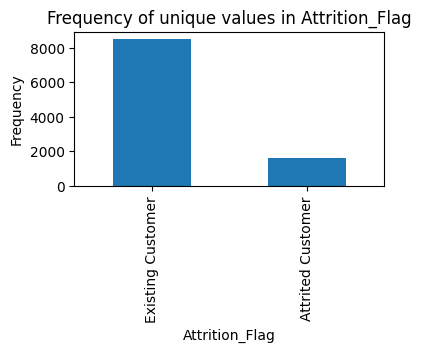

 'Gender': ['M' 'F']


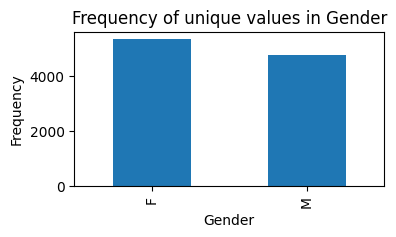

 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


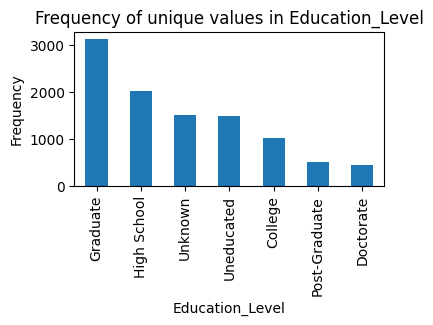

 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']


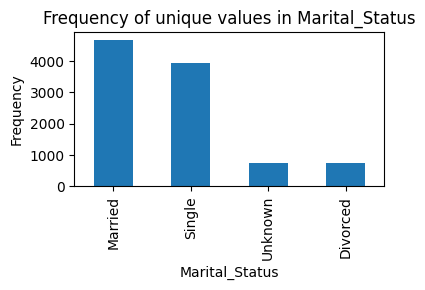

 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


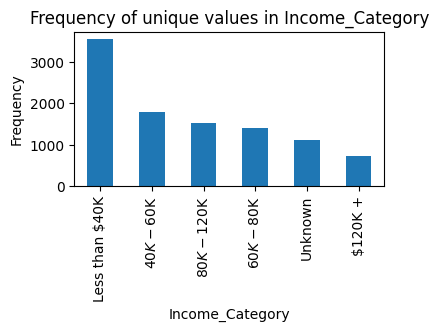

 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


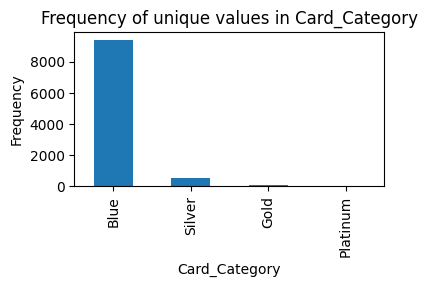

In [39]:
# Identify non-numerical columns
non_numerical_cols = df.select_dtypes(include=['object']).columns

# Print unique values for each non-numerical column
for col in non_numerical_cols:
    unique_values = df[col].unique()
    print(f" '{col}': {unique_values}")
    plt.figure(figsize=(4, 2))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of unique values in {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

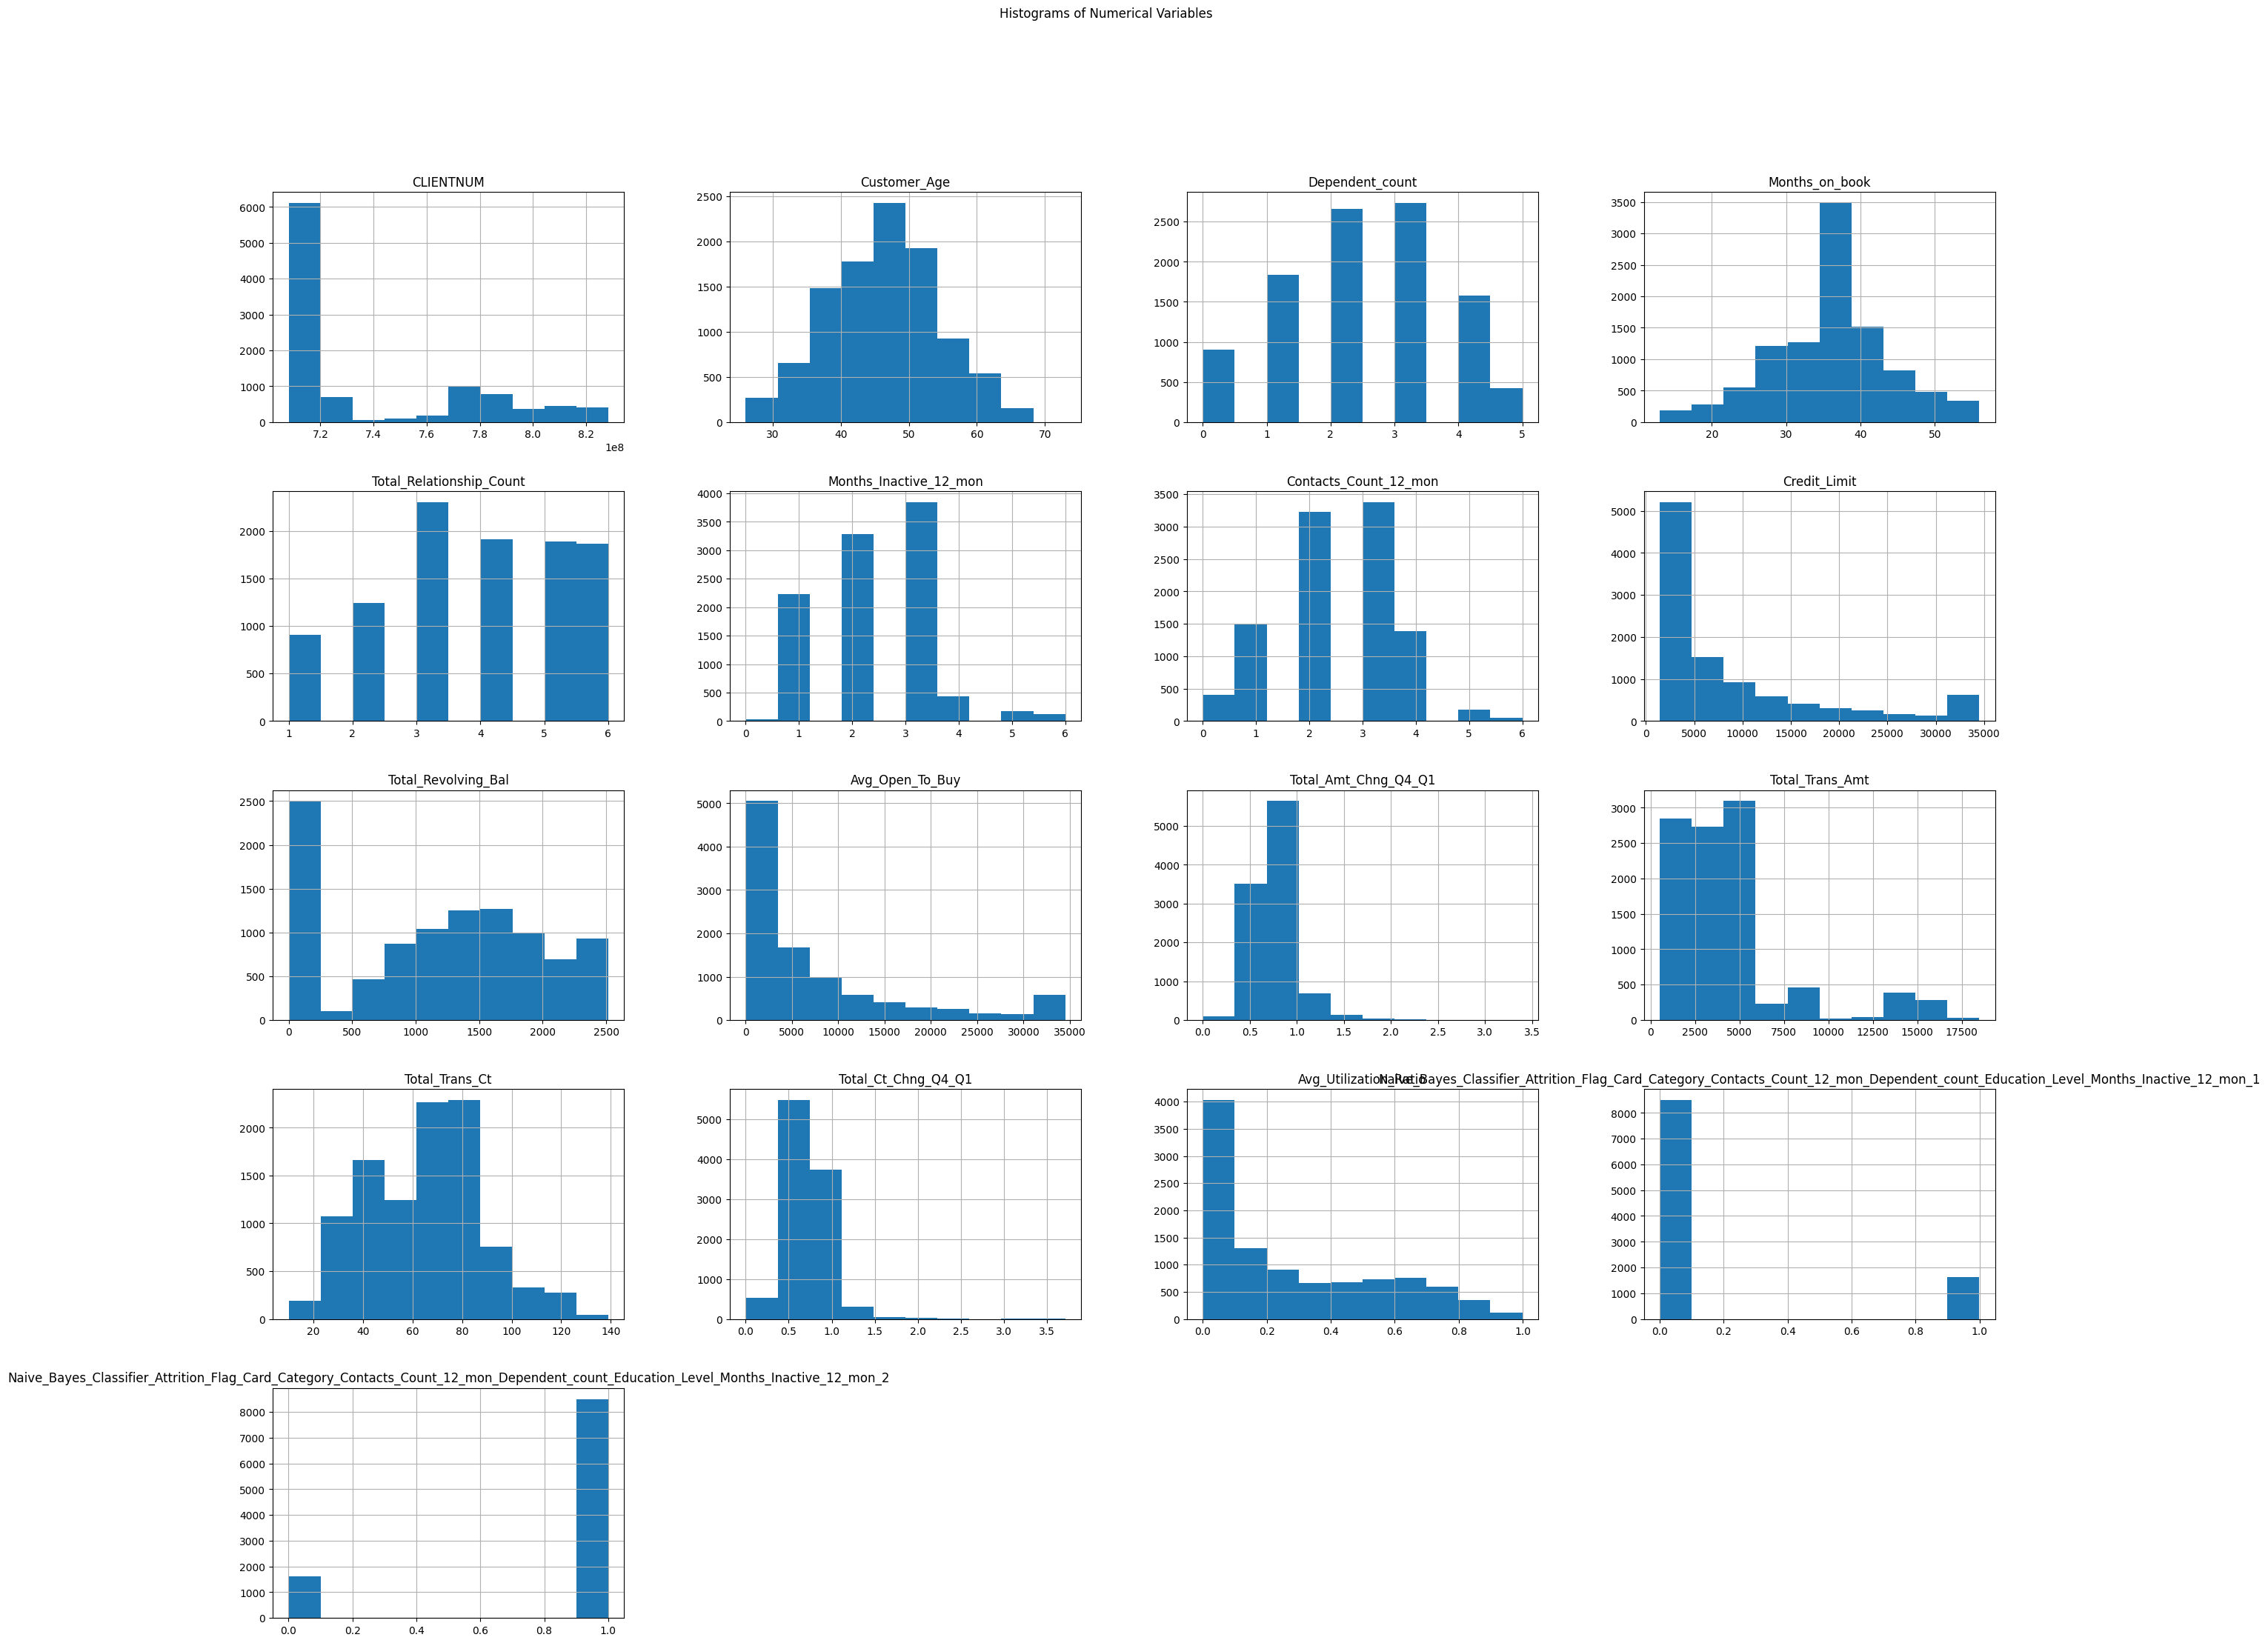

In [40]:
# Plot histograms for all numerical columns
df.hist(bins=10, figsize=(30, 25))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

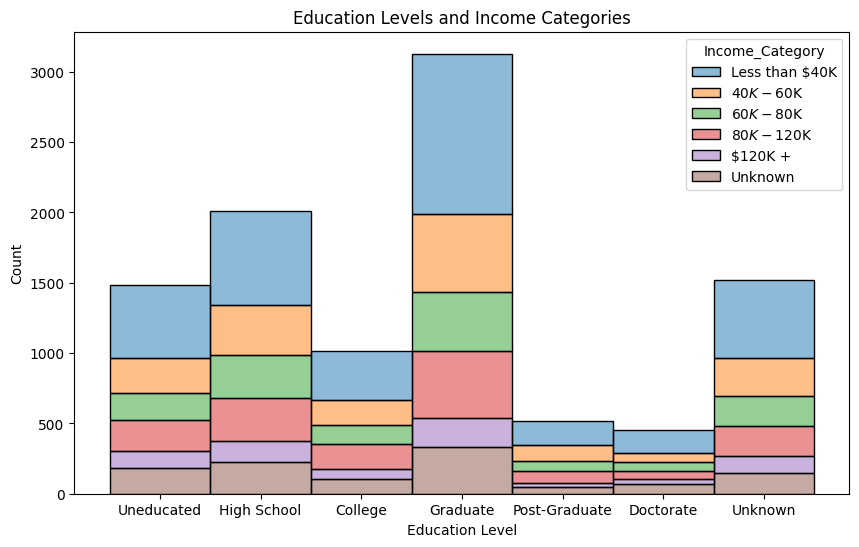

In [41]:
education_order = ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate", "Unknown"]
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +", "Unknown"]

df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=education_order, ordered=True)
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=income_order, ordered=True)

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Education_Level', hue='Income_Category', alpha=0.5, common_norm=False, multiple='stack')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Levels and Income Categories')
plt.show()


# Data cleaning and preprocessing

Naive Bayes and the client id values are erased and the dataset is split into X and y values

In [42]:
df = df[df.columns[1:-2]]

X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

## Encode categorical variables

In [43]:
#1 = Existing Customer, 0 = Attrited Customer

le = LabelEncoder()
y_enc = le.fit_transform(y)
y_enc[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
X_ohe = pd.get_dummies(X)
X_ohe

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_Less than $40K,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_$120K +,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,True,False,False,False,True,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,True,False,False,False,False,False,True,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,True,False,False,True,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,True,False,False,False,False,False,True,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,False,True,False,False,False,False,True,False,False,False
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,False,True,False,False,False,False,True,False,False,False
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,True,False,False,False,False,False,True,False,False,False
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,False,True,False,False,False,False,True,False,False,False


## Normalization

In [45]:
scaled_columns_names = X_ohe.columns[:14]
columns_to_scale = X_ohe[scaled_columns_names]

In [46]:
standard_scaler = MinMaxScaler()
scaled_columns = standard_scaler.fit_transform(columns_to_scale)

X_scaled_columns = pd.DataFrame(scaled_columns)
X_scaled_columns.columns = scaled_columns_names

X_ohe_columns = X_ohe.drop(scaled_columns_names, axis=1)

In [47]:
df_concat = pd.concat([X_scaled_columns, X_ohe_columns], axis=1)
df_concat.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_Less than $40K,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_$120K +,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,...,False,False,True,False,False,False,True,False,False,False
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,...,True,False,False,False,False,False,True,False,False,False
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,...,False,False,False,True,False,False,True,False,False,False
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,...,True,False,False,False,False,False,True,False,False,False
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,...,False,False,True,False,False,False,True,False,False,False


# NN model1